In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

# Create a ``MMPTree`` for a given signal

## MMP pour ``sparsity_level = 3`` pour l'``id = 1876``

In [ ]:
signal_dict = workbench.signalDictFromId(id=1876)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=3, connections=2)

In [ ]:
mmp_tree.runMMPDF(branches_number=5, verbose=True)

>> Branch n°1 exploring path : (1, 1, 1)
Added child node with activation index 838414
Added child node with activation index 802176
Added child node with activation index 1075811
>> Branch n°2 exploring path : (2, 1, 1)
Added child node with activation index 773571
Added child node with activation index 802176
>> Branch n°3 exploring path : (1, 2, 1)
Added child node with activation index 226835
Added child node with activation index 1061555
Added child node with activation index 802176
>> Branch n°4 exploring path : (2, 2, 1)
Added child node with activation index 262594
>> Branch n°5 exploring path : (1, 1, 2)
Added child node with activation index 796467


In [ ]:
mmp_tree.printLeaves()

Branch n°1 leaf with MSE = 0.0004051687768090662
Branch n°2 leaf with MSE = 0.00044260426138311847
Branch n°3 leaf with MSE = 0.00011995533928115535
Branch n°4 leaf with MSE = 0.0004177928156980351
Branch n°5 leaf with MSE = 0.00026989294789459185


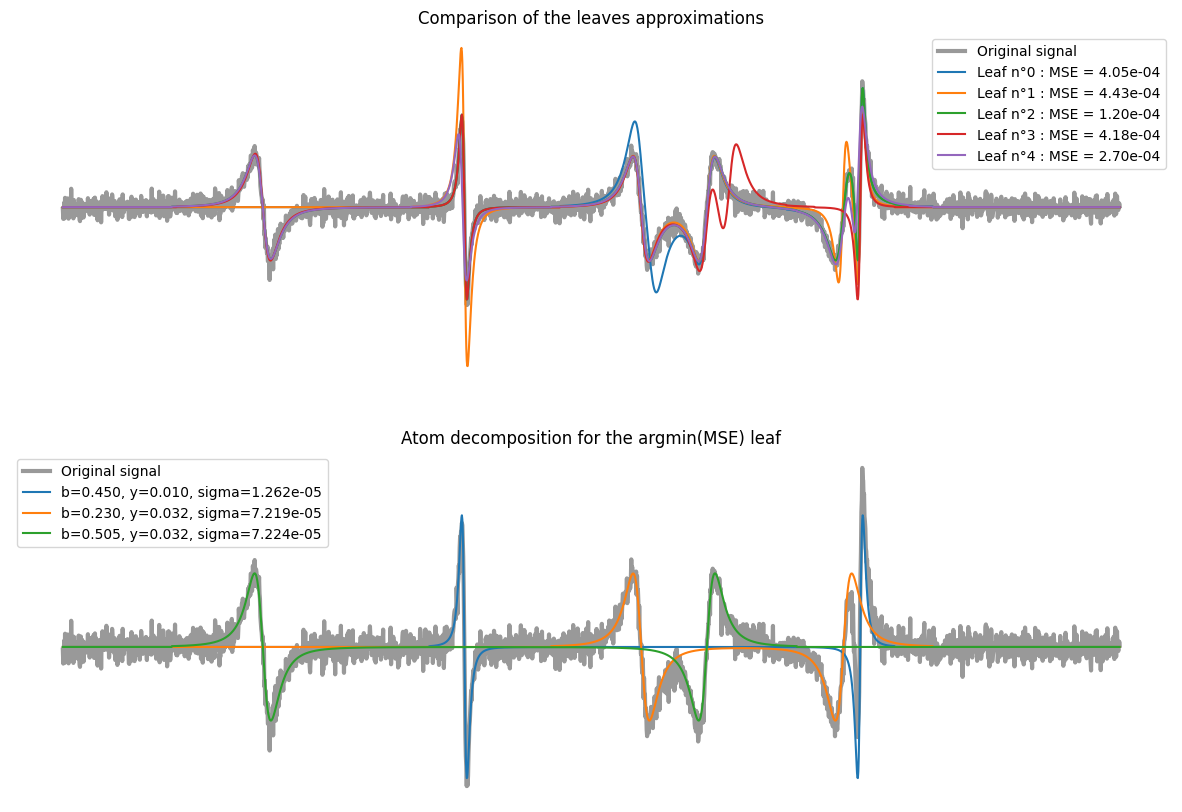

In [ ]:
mmp_tree.plotLeavesComparison()

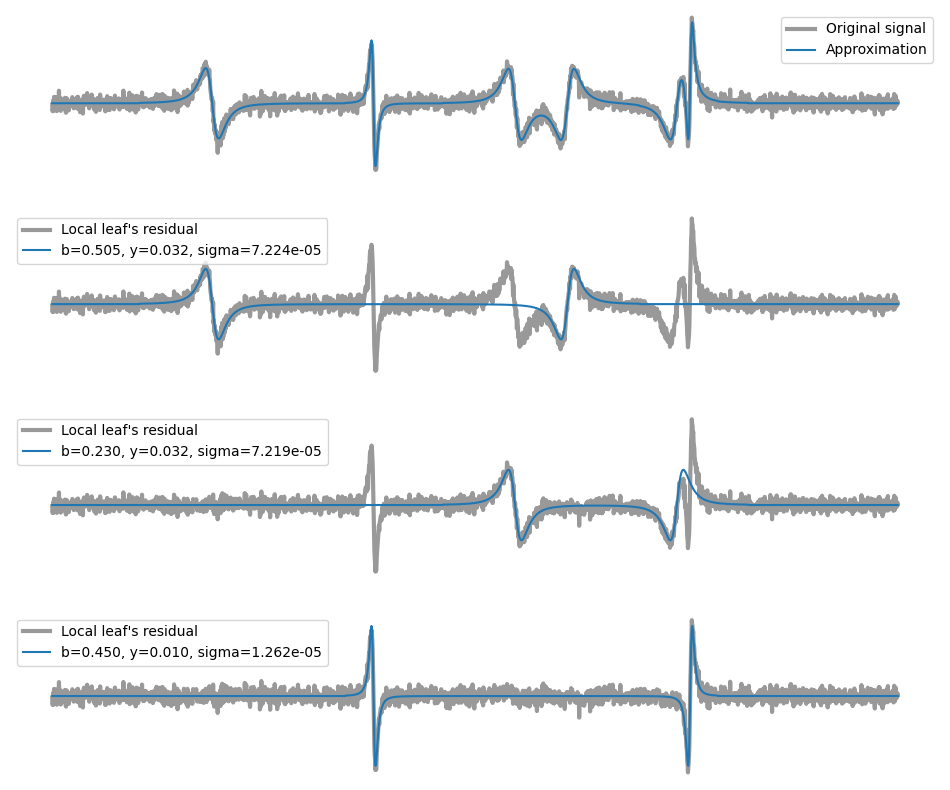

In [ ]:
mmp_tree.plotLeafDecomposition(2)

## MMP pour ``sparsity_level = 4`` pour l'``id = 2133``

In [ ]:
signal_dict = workbench.signalDictFromId(id=2133)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=4, connections=2)

In [ ]:
mmp_tree.runMMPDF(branches_number=5, verbose=True)

>> Branch n°1 exploring path : (1, 1, 1)
Added child node with activation index 838414
Added child node with activation index 802176
Added child node with activation index 1075811
>> Branch n°2 exploring path : (2, 1, 1)
Added child node with activation index 773571
Added child node with activation index 802176
>> Branch n°3 exploring path : (1, 2, 1)
Added child node with activation index 226835
Added child node with activation index 1061555
Added child node with activation index 802176
>> Branch n°4 exploring path : (2, 2, 1)
Added child node with activation index 262594
>> Branch n°5 exploring path : (1, 1, 2)
Added child node with activation index 796467


In [ ]:
mmp_tree.printLeaves()

Branch n°1 leaf with MSE = 0.0004051687768090662
Branch n°2 leaf with MSE = 0.00044260426138311847
Branch n°3 leaf with MSE = 0.00011995533928115535
Branch n°4 leaf with MSE = 0.0004177928156980351
Branch n°5 leaf with MSE = 0.00026989294789459185


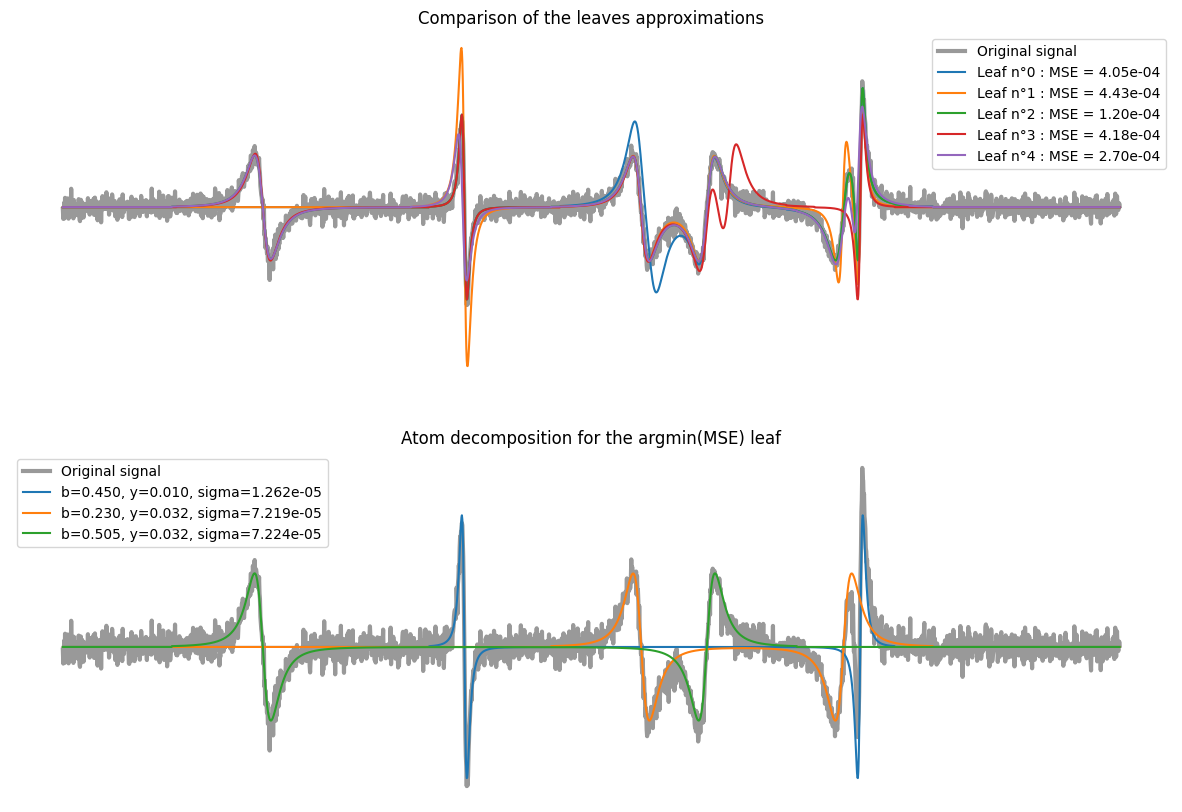

In [ ]:
mmp_tree.plotLeavesComparison()

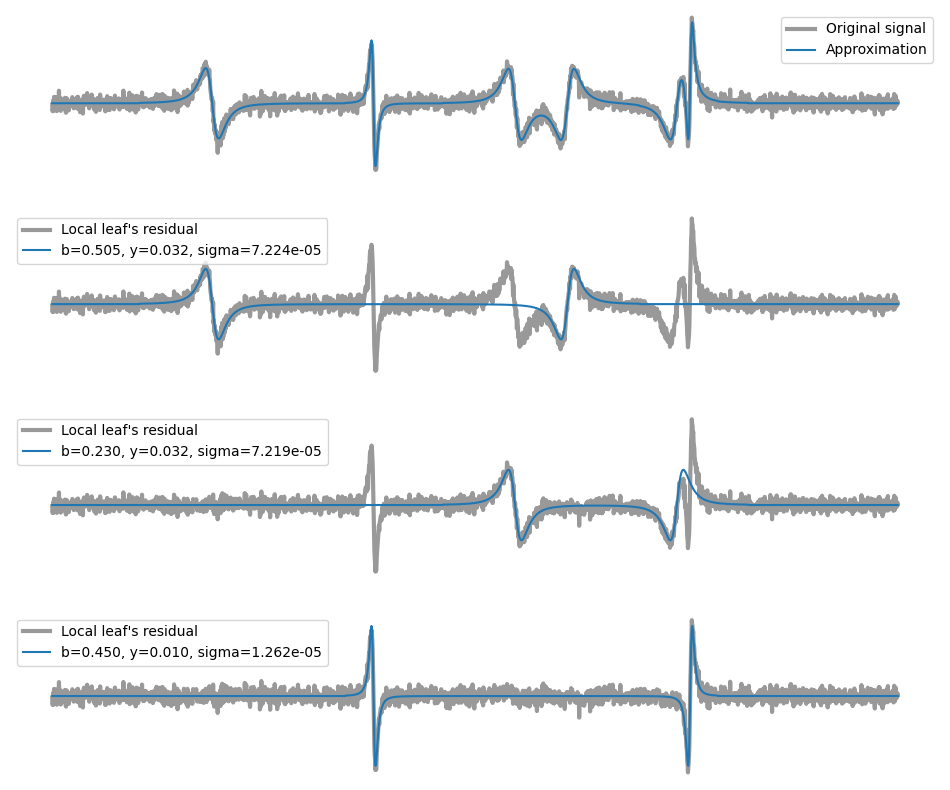

In [ ]:
mse_argmin = np.argmin([leaf.getMSE() for leaf in mmp_tree.leaves_nodes])
mmp_tree.plotLeafDecomposition(mse_argmin)

## MMP pour ``sparsity_level = 5`` pour l'``id = 2398``

In [ ]:
signal_dict = workbench.signalDictFromId(id=2398)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=4, connections=2)

In [4]:
mmp_tree.runMMPDF(branches_number=5, verbose=True)

>> Branch n°1 exploring path : (1, 1, 1)
Added child node with activation index 838414
Added child node with activation index 802176
Added child node with activation index 1075811
>> Branch n°2 exploring path : (2, 1, 1)
Added child node with activation index 773571
Added child node with activation index 802176
>> Branch n°3 exploring path : (1, 2, 1)
Added child node with activation index 226835
Added child node with activation index 1061555
Added child node with activation index 802176
>> Branch n°4 exploring path : (2, 2, 1)
Added child node with activation index 262594
>> Branch n°5 exploring path : (1, 1, 2)
Added child node with activation index 796467


In [5]:
mmp_tree.printLeaves()

Branch n°1 leaf with MSE = 0.0004051687768090662
Branch n°2 leaf with MSE = 0.00044260426138311847
Branch n°3 leaf with MSE = 0.00011995533928115535
Branch n°4 leaf with MSE = 0.0004177928156980351
Branch n°5 leaf with MSE = 0.00026989294789459185


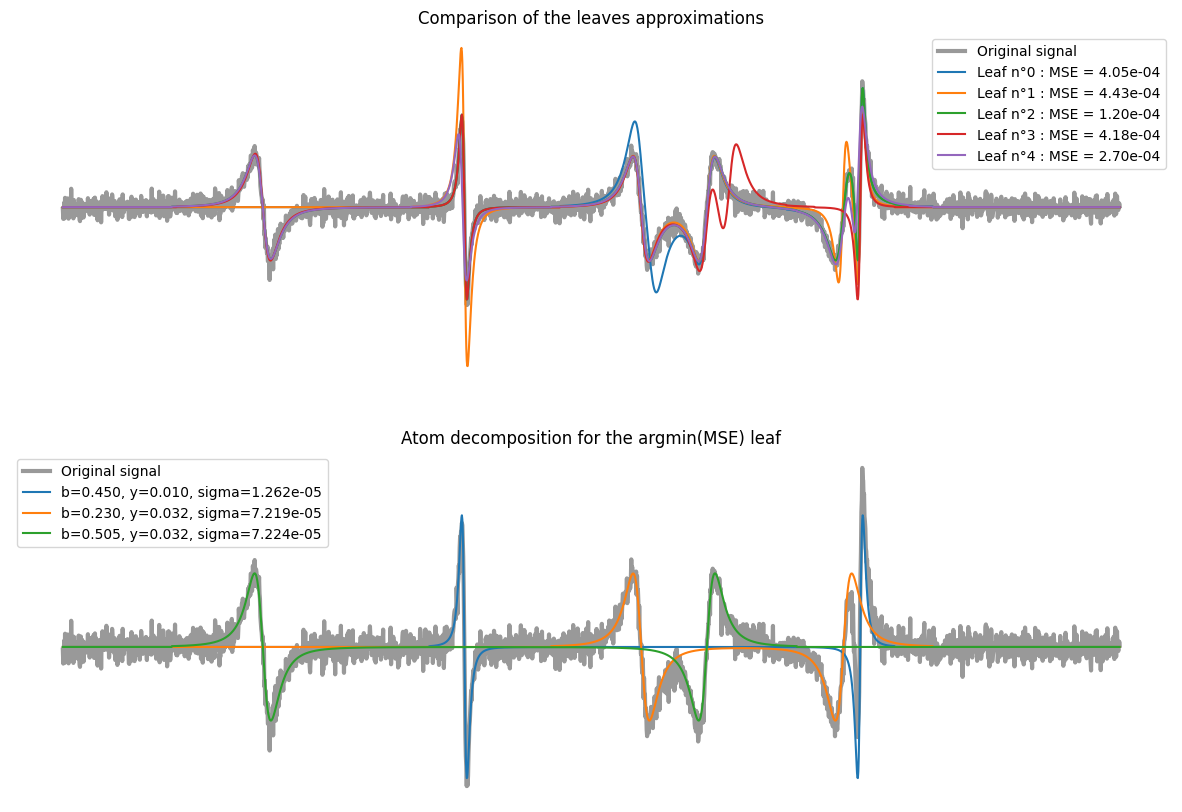

In [6]:
mmp_tree.plotLeavesComparison()

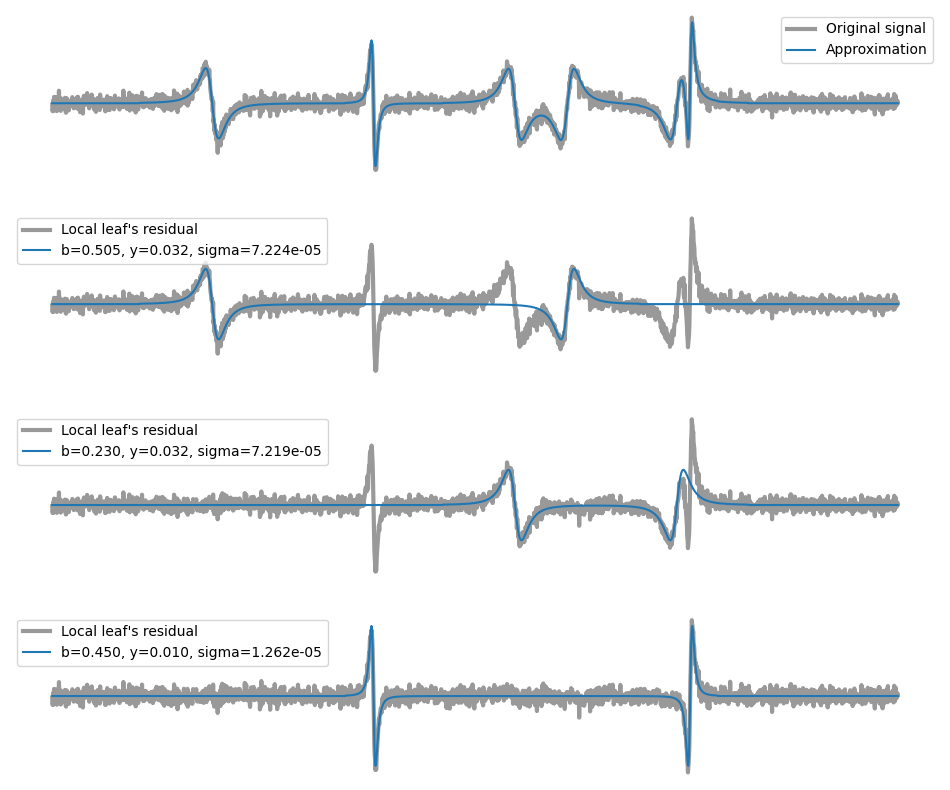

In [7]:
mse_argmin = np.argmin([leaf.getMSE() for leaf in mmp_tree.leaves_nodes])
mmp_tree.plotLeafDecomposition(mse_argmin)